In [1]:
import algos
import bandit
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
import utils

plt.rcParams['figure.figsize'] = [7, 4]
plt.rcParams['figure.dpi'] = 100

DS_NAME = None
N_SWITCHES = 150
N_BANDITS = 5
OPT_SIZE = 2
HORIZON = 250
max_n_expert = len(list(combinations(np.arange(N_BANDITS),OPT_SIZE)))
N_EXPERT = None #None: All possible combinations
if N_EXPERT is not None:
    print(f'N_EXPERT = {N_EXPERT}')
    assert N_EXPERT<=max_n_expert, f"The number of expert ({N_EXPERT}) must be smaller than the maximum combination ({max_n_expert})"
assert N_BANDITS<=HORIZON, f"The number of arm ({N_BANDITS}) must be smaller than the horizon ({HORIZON})"
N_EXPS = 2 #No. of repeat experiments
GAP_THRESHOLD = min(1,np.sqrt(N_BANDITS*np.log(N_SWITCHES+1)/HORIZON))
kwargs = {'switches_cache_step': 10,
          'gap_constrain':GAP_THRESHOLD*1.05, # 1.05 is small gap, 1.1 for large
          'plot_var': False}
assert kwargs['gap_constrain']>=GAP_THRESHOLD, f"kwargs['gap_constrain'] ({kwargs['gap_constrain']}) must be larger than GAP_THRESHOLD ({GAP_THRESHOLD})"

#EWAmaxStats params
N_UNBIASED_OBS = 1

## Regret vs Number of switches

  0%|          | 0/2 [00:00<?, ?it/s]

Optimal expert index = 2


100%|██████████| 2/2 [00:47<00:00, 23.93s/it]


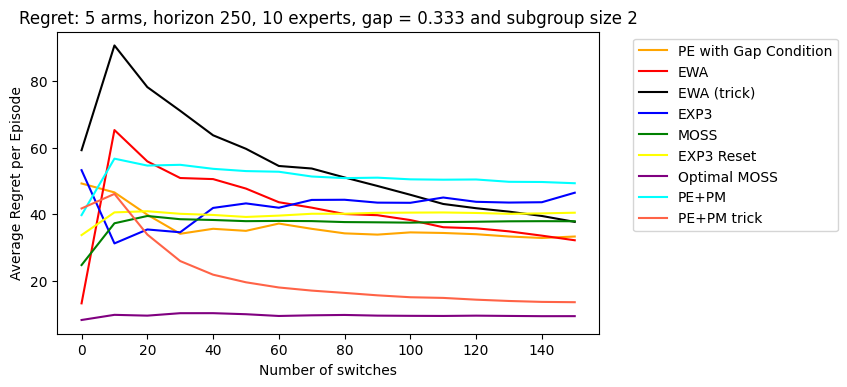

In [2]:
(X, regret_dict, title, xlabel, ylabel) = utils.switches_exp(N_EXPS, N_SWITCHES, N_BANDITS, HORIZON, 
                   N_UNBIASED_OBS, OPT_SIZE, N_EXPERT, DS_NAME, **kwargs)
indices = np.arange(0, X.shape[0], kwargs['switches_cache_step']).astype(int)
X = X[indices]
meta_regrets = regret_dict['meta_regrets']
exp3_regrets = regret_dict['exp3_regrets']
moss_regrets = regret_dict['moss_regrets']
exp3_reset_regrets = regret_dict['exp3_reset_regrets']
meta_trick_regrets = regret_dict['meta_trick_regrets']
MetaPElargeGap_regrets = regret_dict['MetaPElargeGap_regrets']
opt_moss_regrets = regret_dict['opt_moss_regrets']
MetaPM_regrets = regret_dict['MetaPM_regrets']
MetaPMtrick_regrets = regret_dict['MetaPMtrick_regrets']
pass

## Regret vs Horizon

  0%|          | 0/2 [00:00<?, ?it/s]

Optimal expert index = 5


100%|██████████| 2/2 [04:14<00:00, 127.17s/it]


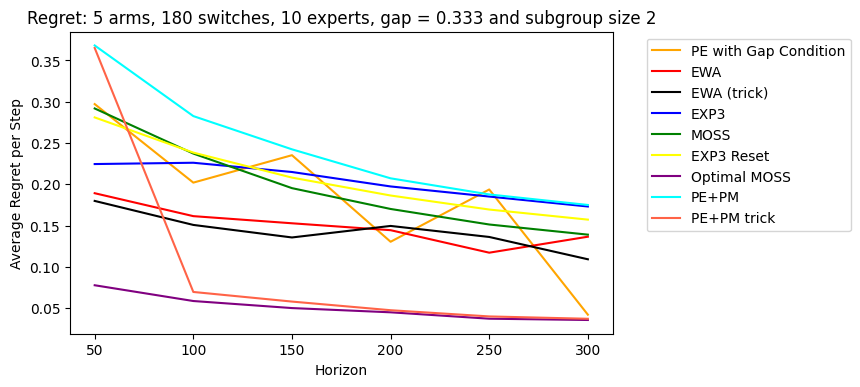

In [2]:
horizon_list = np.arange(50, 310, 50)
n_switches = np.ceil(N_SWITCHES*max(horizon_list)/HORIZON).astype(int)
# horizon_list = np.array([1, 100, 300])
(X_h, regret_dict_h, title, xlabel, ylabel) = \
utils.horizon_exp(N_EXPS, n_switches, N_BANDITS, N_UNBIASED_OBS, OPT_SIZE, N_EXPERT, 
                  DS_NAME, horizon_list = horizon_list, **kwargs)
pass

## Regret vs # of arm

  0%|          | 0/2 [00:00<?, ?it/s]

Optimal expert index = 1
Optimal expert index = 4
Optimal expert index = 3
Optimal expert index = 3
Optimal expert index = 4


 50%|█████     | 1/2 [02:03<02:03, 123.44s/it]

Optimal expert index = 0
Optimal expert index = 2
Optimal expert index = 1
Optimal expert index = 4
Optimal expert index = 2


100%|██████████| 2/2 [04:06<00:00, 123.33s/it]


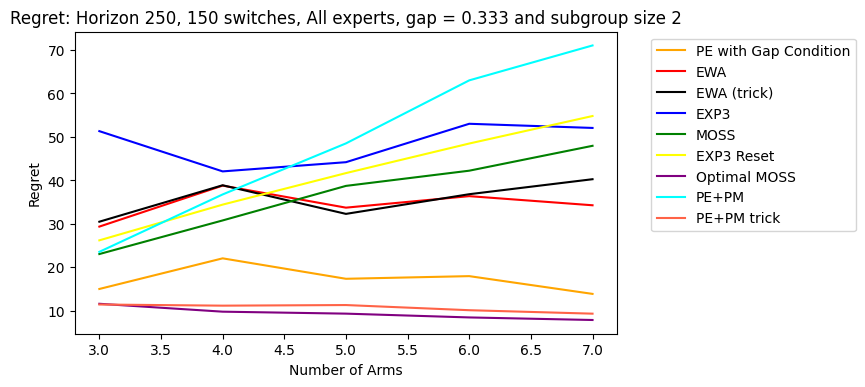

In [3]:
n_bandits_list = np.arange(3,8,1)
# n_switches = np.ceil(10*N_SWITCHES*max(n_bandits_list)/N_BANDITS).astype(int)
(X_b, regret_dict_b, title, xlabel, ylabel) = \
utils.arm_exp(N_EXPS, N_SWITCHES, HORIZON, N_UNBIASED_OBS, 
              OPT_SIZE, N_EXPERT, DS_NAME, n_bandits_list, **kwargs)
pass

## Regret vs subgroup size

  0%|          | 0/2 [00:00<?, ?it/s]

Optimal expert index = 1
Optimal expert index = 3
Optimal expert index = 0
Optimal expert index = 4
Optimal expert index = 0


 50%|█████     | 1/2 [02:04<02:04, 124.66s/it]

Optimal expert index = 1
Optimal expert index = 2
Optimal expert index = 1
Optimal expert index = 3
Optimal expert index = 0


100%|██████████| 2/2 [04:07<00:00, 123.87s/it]


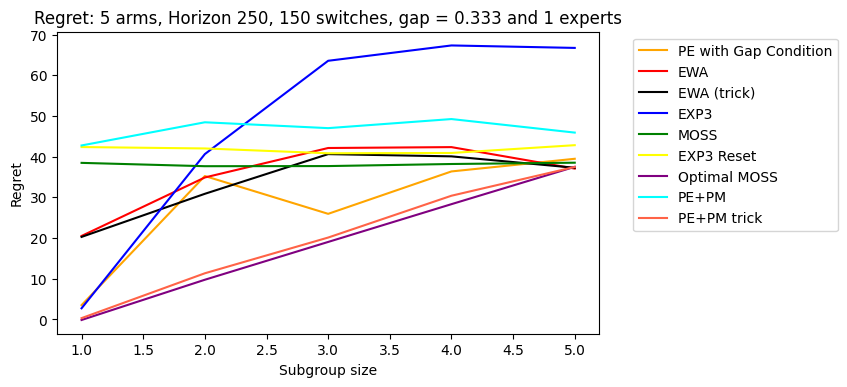

In [2]:
(X_e, regret_dict_e, title, xlabel, ylabel) = utils.subgroup_size_exp(N_EXPS, 
                                  N_SWITCHES, N_BANDITS, HORIZON, N_UNBIASED_OBS, N_EXPERT, DS_NAME, 
                                  opt_size_list = np.arange(1,N_BANDITS+1,1), **kwargs)
pass